In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scanpy as sc
import seaborn as sns
import os

import os, sys, shutil, importlib, glob
from tqdm.notebook import tqdm
from celloracle import motif_analysis as ma
import celloracle as co

/data/jiangjunyao/miniconda3/envs/normal/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/data/jiangjunyao/miniconda3/envs/normal/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/d

In [2]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [6,6]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 600

%matplotlib inline

In [3]:
peak = pd.read_csv('/data/jiangjunyao/polyATAC/nmp_multi_20250616/all_nmp_p2g/whole_trajectory_p2g_for_celloracle.csv',index_col=0)
#peak = pd.read_csv('/data/jiangjunyao/polyATAC/nmp_final/ct_p2g/all_p2g.csv',index_col=0)
peak.columns = ['peak_id','gene_short_name']
tfi = ma.TFinfo(peak_data_frame=peak,
            ref_genome='mm10',
            genomes_dir=None)
tfi.scan(fpr=0.02,
     motifs=None,  # If you enter None, default motifs will be loaded.
     verbose=True,n_cpus=-1)
tfi.reset_filtering()
# Do filtering
tfi.filter_motifs_by_score(threshold=10)
# Format post-filtering results.
tfi.make_TFinfo_dataframe_and_dictionary(verbose=True)
df = tfi.to_dataframe()

No motif data entered. Loading default motifs for your species ...
 Default motif for vertebrate: gimme.vertebrate.v5.0. 
 For more information, please see https://gimmemotifs.readthedocs.io/en/master/overview.html 

Initiating scanner... 



2025-07-17 21:57:33,415 - DEBUG - using background: genome mm10 with size 200


Calculating FPR-based threshold. This step may take substantial time when you load a new ref-genome. It will be done quicker on the second time. 

Motif scan started .. It may take long time.



Scanning:   0%|          | 0/4341 [00:00<?, ? sequences/s]

Filtering finished: 688457 -> 153312
1. Converting scanned results into one-hot encoded dataframe.


  0%|          | 0/4341 [00:00<?, ?it/s]

2. Converting results into dictionaries.


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/1092 [00:00<?, ?it/s]

In [4]:
df.to_csv('/data/jiangjunyao/polyATAC/nmp_multi_20250717/baseGRN/baseGRN.csv')

In [5]:
#adata1 = sc.read_h5ad('/data/jiangjunyao/polyATAC/nmp_multi_20250616/merge_all_nmp_cospar.adata')
adata1 = sc.read_h5ad('/data/jiangjunyao/polyATAC/nmp_multi_20250717/nmp_multi.h5ad')
sc.pp.normalize_total(adata1)
sc.pp.log1p(adata1)
sc.pp.highly_variable_genes(adata1,n_top_genes=2000,subset=False)
nmp_hvg = adata1.var_names[adata1.var['highly_variable']].tolist()
nmp_deg = pd.read_csv('/data/jiangjunyao/polyATAC/nmp_multi_20250717/differential analysis/nmp_deg_two_fate_30.csv',index_col=0)
nmp_deg = nmp_deg[nmp_deg['cluster'] == 'PXM NMP']
#all_gene =nmp_hvg
nmp_deg = nmp_deg['gene'].tolist()
all_gene = nmp_deg+nmp_hvg
all_gene = list(set(all_gene))
adata_use = adata1[:,all_gene]
adata_use

View of AnnData object with n_obs × n_vars = 17023 × 2098
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Batch', 'ct_leiden', 'leiden', 'cell', 'nCount_Peak_ct', 'nFeature_Peak_ct', 'barcodes', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_Activity_DAR', 'nFeature_Activity_DAR', 'pgen', 'germ', 'detection', 'percent.mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'RNA_snn_res.0.8', 'seurat_clusters', 'RNA_snn_res.2', 'celltype', 'RNA_snn_res.2.5', 'mouse', 'nCount_TFActivity_all_peak', 'nFeature_TFActivity_all_peak', 'celltype2', 'rare_barcodes', 'pm_score', 'sc_score', 'celltype_ori', 'aver_fate_pxm_dar', 'aver_fate_pxm_dar1', 'aver_fate_pxm_deg', 'aver_fate_sc_dar', 'aver_fate_sc_deg', 'aver_fate_sc_dar1', 'aver_fate_sc_dar_scale', 'aver_fate_pxm_gene', 'aver_fate_sc_gene', 'aver_fate_pxm_link1', 'aver_fate_sc_link1', 'pm_score2', 'sc_score2'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_diffmap', '

build grn based on celloracle


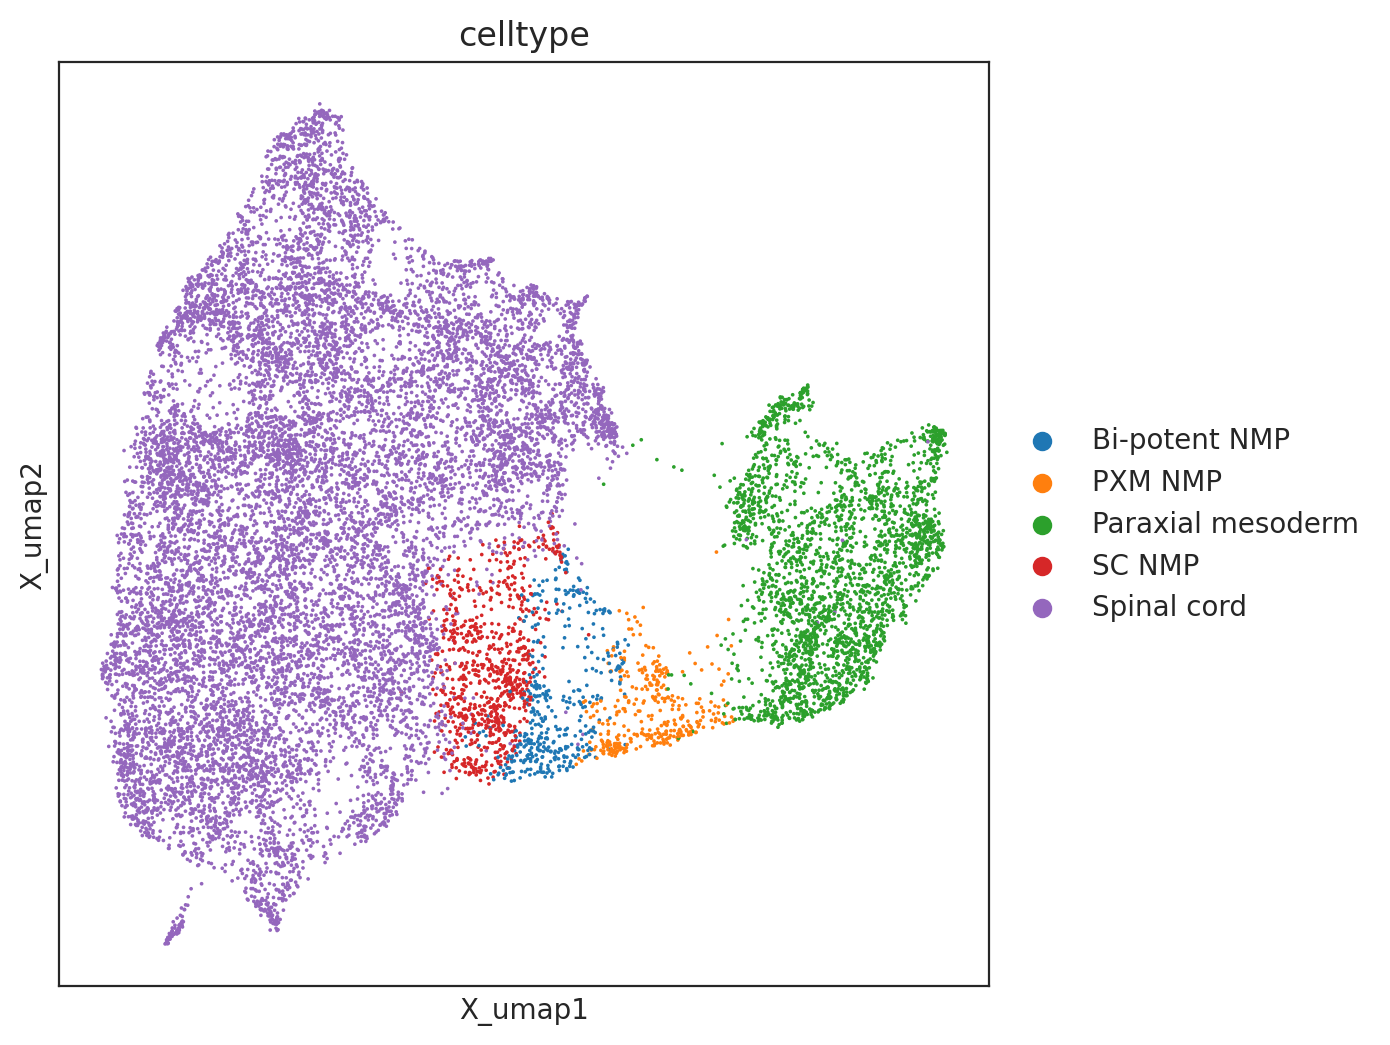

Auto-selected k is :50


  0%|          | 0/5 [00:00<?, ?it/s]

Inferring GRN for Bi-potent NMP...


  0%|          | 0/377 [00:00<?, ?it/s]

Inferring GRN for PXM NMP...


  0%|          | 0/377 [00:00<?, ?it/s]

Inferring GRN for Paraxial mesoderm...


  0%|          | 0/377 [00:00<?, ?it/s]

Inferring GRN for SC NMP...


  0%|          | 0/377 [00:00<?, ?it/s]

Inferring GRN for Spinal cord...


  0%|          | 0/377 [00:00<?, ?it/s]

In [6]:
def run_celloracle(adata,baseGRN=None,group='celltype', embedding_name='X_umap',ncores=10,filter=None,k_use=50):
    k=k_use
    print('build grn based on celloracle')
    oracle = co.Oracle()
    oracle.import_anndata_as_raw_count(adata=adata,
                               cluster_column_name=group,
                               embedding_name=embedding_name)
    oracle.import_TF_data(TF_info_matrix=baseGRN)
    oracle.pcs=adata_use.obsm['X_scvi']
    #oracle.perform_PCA()
    #n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
    n_cell = oracle.adata.shape[0]
    print(f"Auto-selected k is :{k}")
    oracle.knn_imputation(n_pca_dims=10, k=k, balanced=True, b_sight=k*8,
                          b_maxl=k*4, n_jobs=ncores)
    return oracle
oracle=run_celloracle(adata_use,df,'celltype',k_use=50)
links = oracle.get_links(cluster_name_for_GRN_unit='celltype', alpha=10,
                         verbose_level=10)

In [7]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)
links.get_network_score()

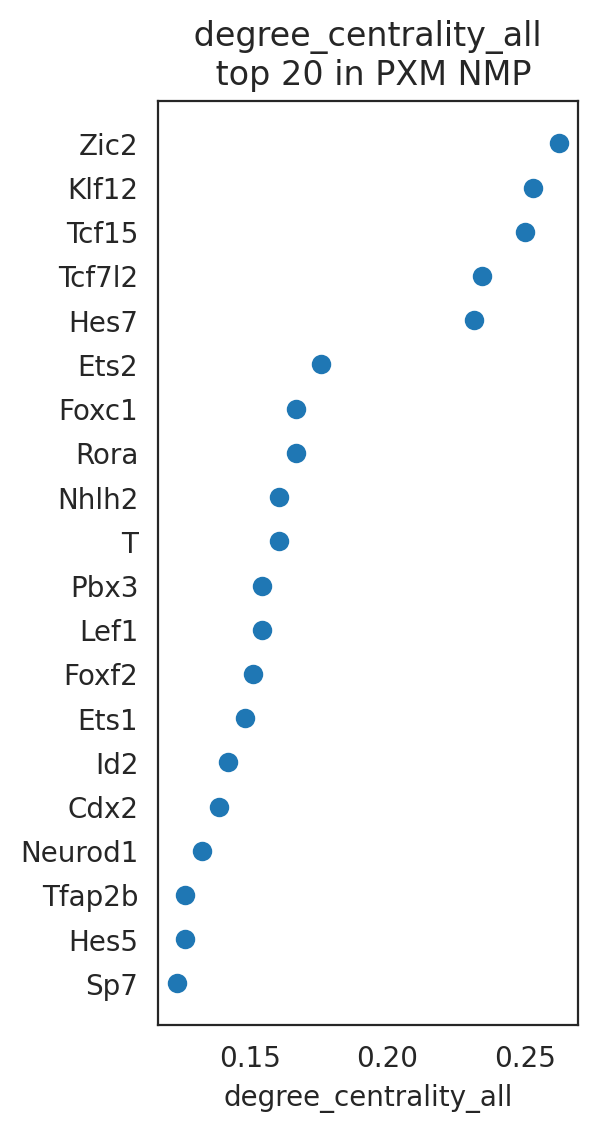

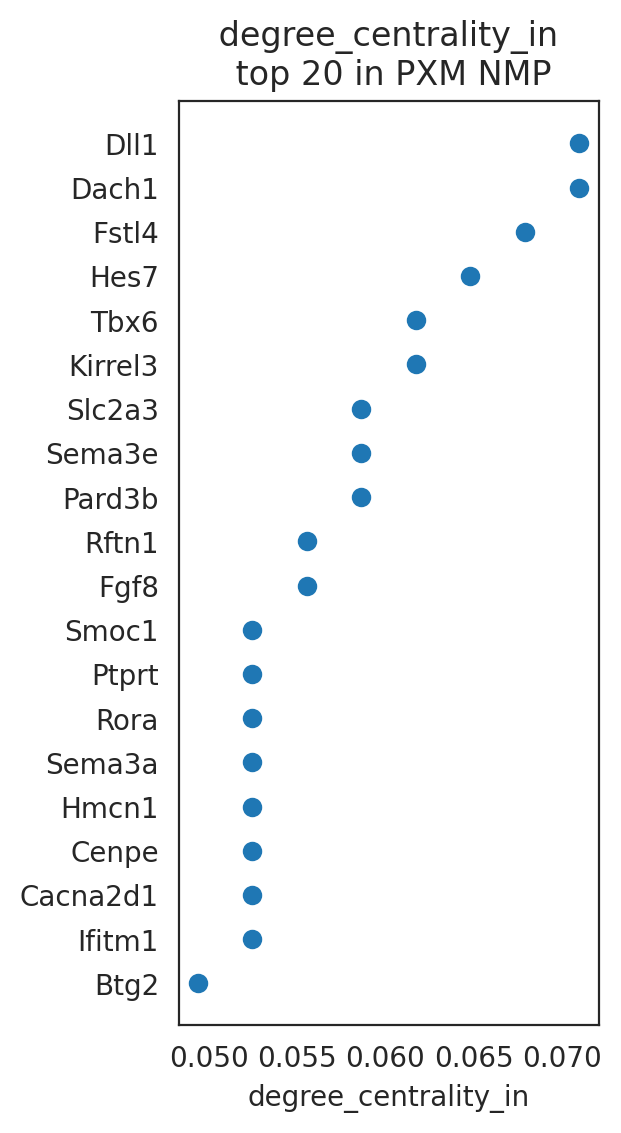

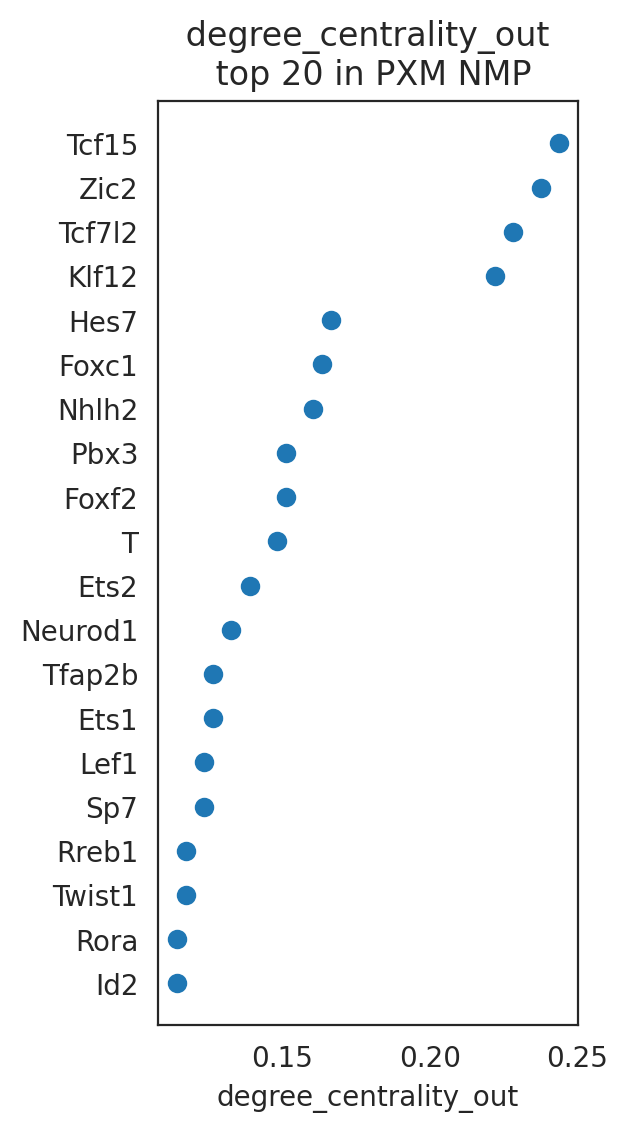

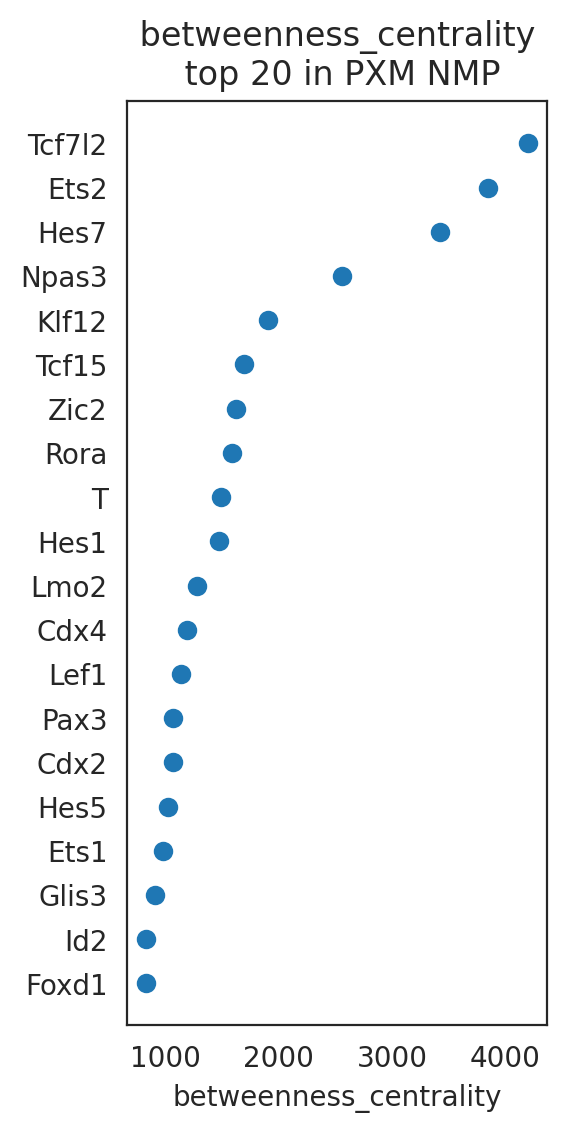

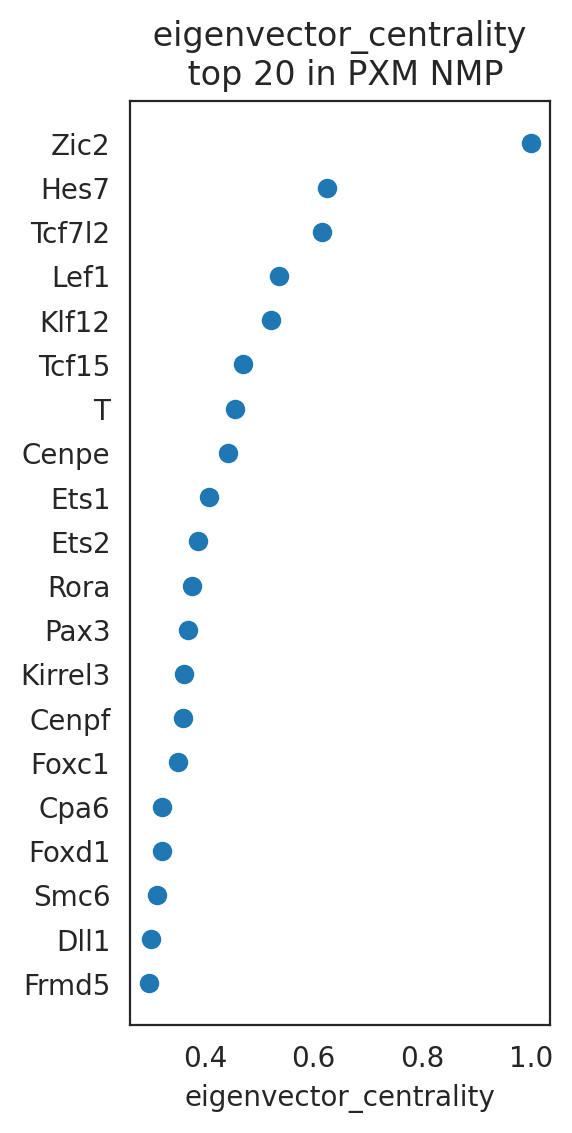

In [8]:
links.plot_scores_as_rank(cluster="PXM NMP", n_gene=20)

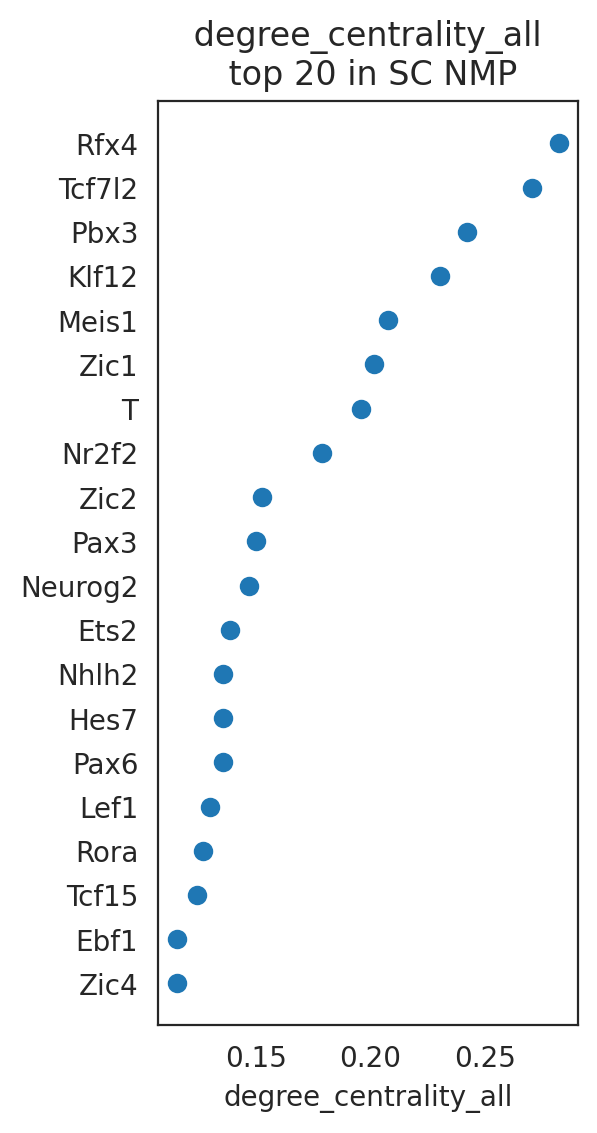

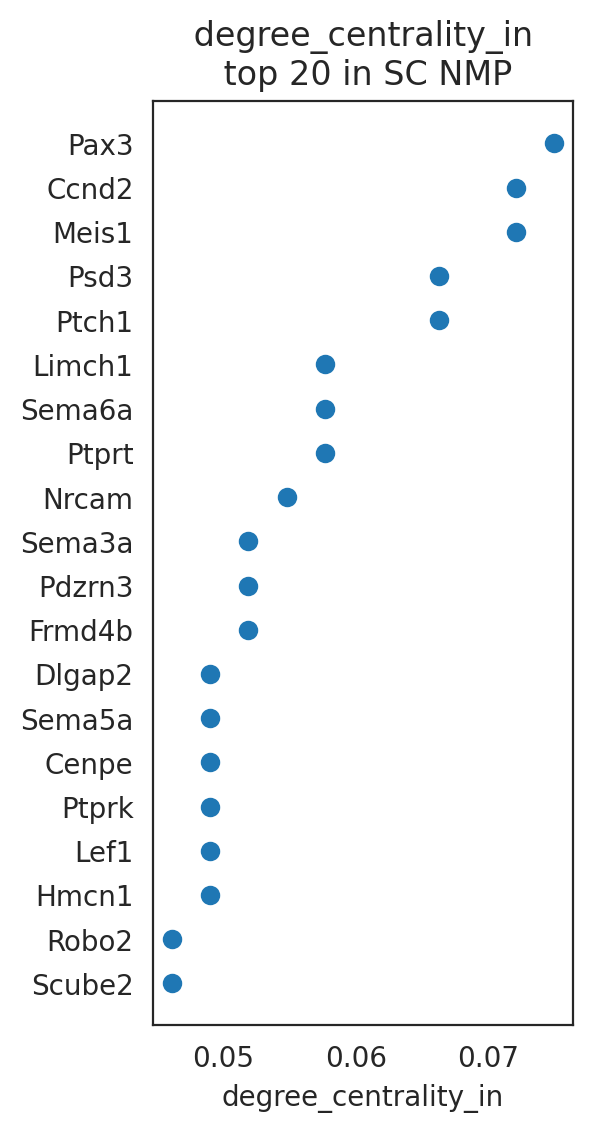

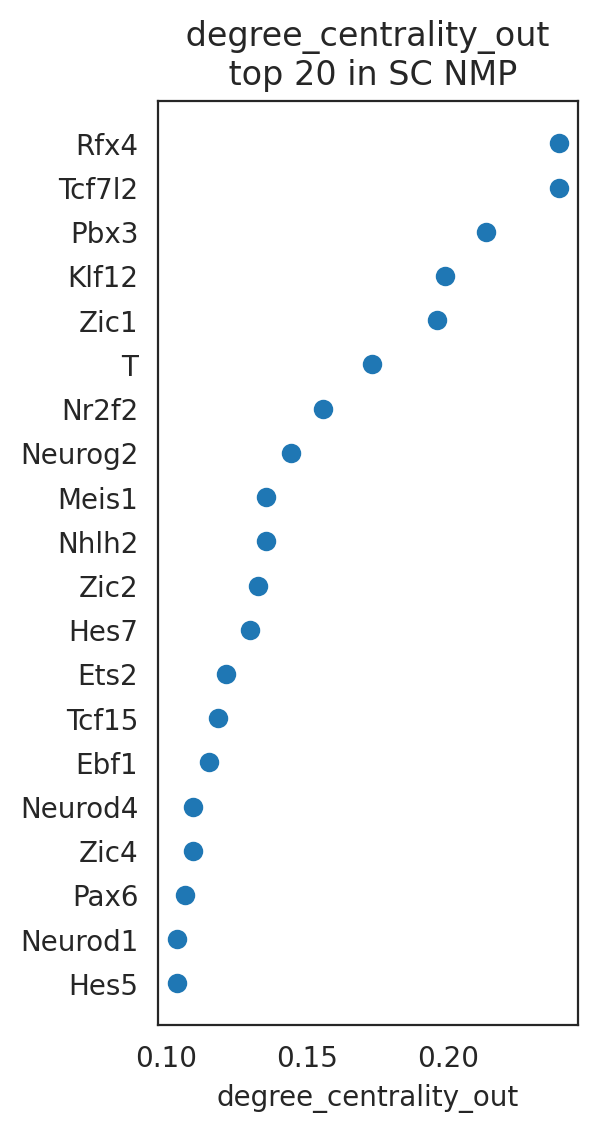

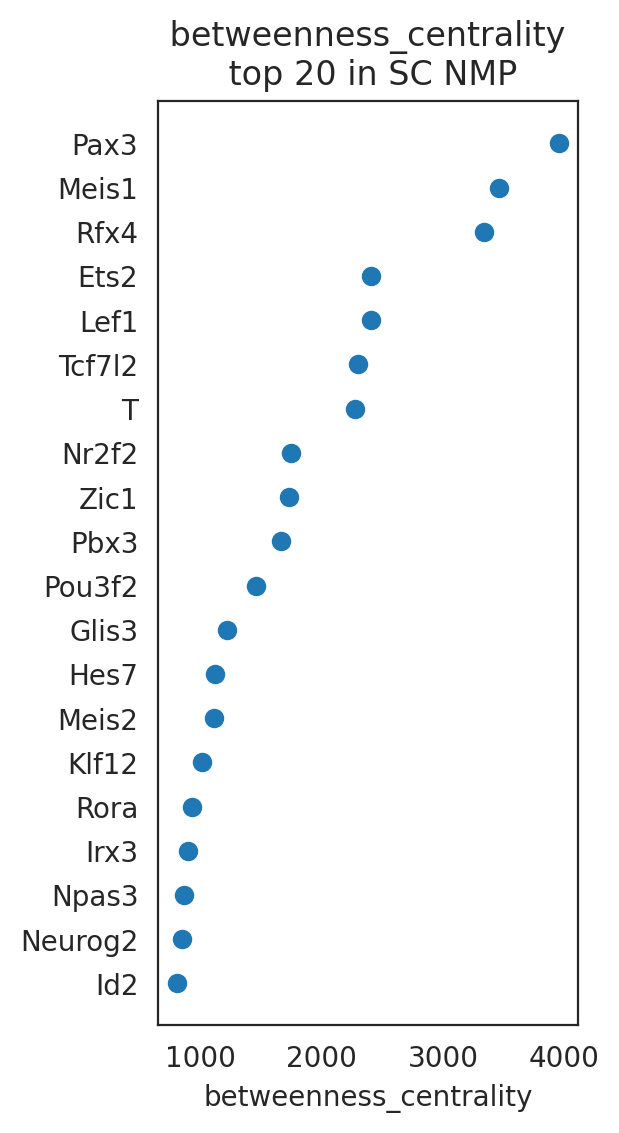

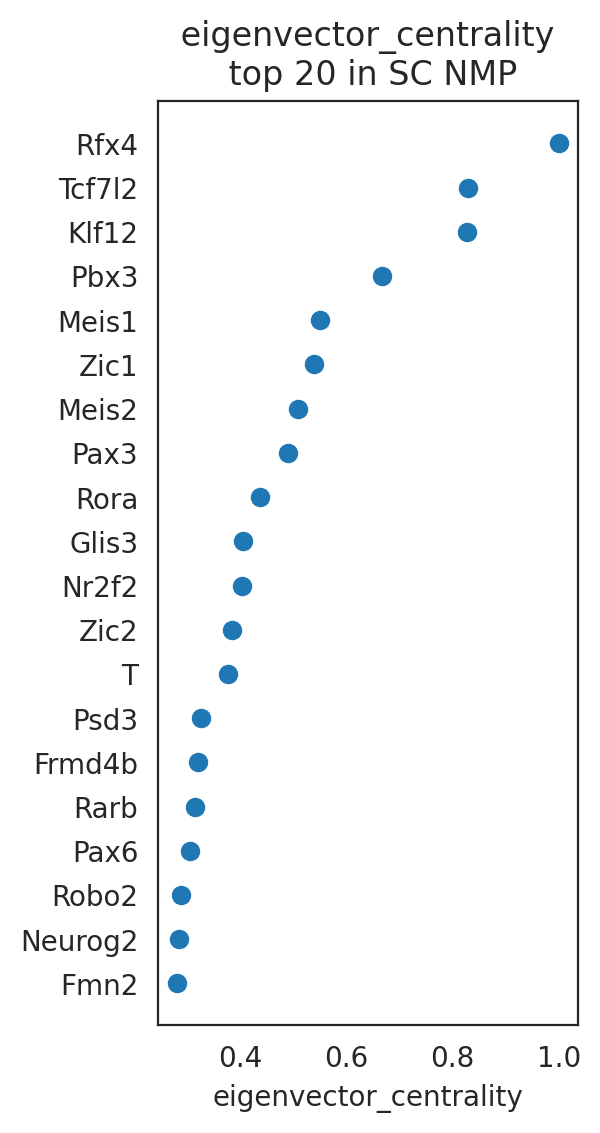

In [9]:
links.plot_scores_as_rank(cluster="SC NMP", n_gene=20)

In [10]:
links.merged_score.to_csv('/data/jiangjunyao/polyATAC/nmp_multi_20250717/grn/grn_score.csv')

In [12]:
links.to_hdf5(file_path='/data/jiangjunyao/polyATAC/nmp_multi_20250717/grn/celloarcle_link.celloracle.links')
links.links_dict['PXM NMP'].to_csv('/data/jiangjunyao/polyATAC/nmp_multi_20250717/grn/pxmnmp_grn.csv')
links.links_dict['SC NMP'].to_csv('/data/jiangjunyao/polyATAC/nmp_multi_20250717/grn/scnmp_grn.csv')
links.links_dict['Bi-potent NMP'].to_csv('/data/jiangjunyao/polyATAC/nmp_multi_20250717/grn/Bi-potent_grn.csv')